In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

Autosave disabled


# Sets implemented as AVL Trees

This notebook implements <em style="color:blue;">sets</em> as <a href="https://en.wikipedia.org/wiki/AVL_tree">AVL trees</a>.  The set $\mathcal{A}$ of <em style="color:blue;">AVL trees</em> is defined inductively:

  - $\texttt{Nil} \in \mathcal{A}$.
  - $\texttt{Node}(k,l,r) \in \mathcal{A}\quad$  iff 
      - $\texttt{Node}(k,l,r) \in \mathcal{B}_<$,
      - $l, r \in \mathcal{A}$, and
      - $|l.\texttt{height}() - r.\texttt{height}()| \leq 1$.

According to this definition, an AVL tree is an <em style="color:blue;">ordered binary tree</em>
such that for every node $\texttt{Node}(k,l,r)$ in this tree the height of the left subtree $l$ and the right
subtree  $r$ differ at most by one. 

The class `Set` represents the nodes of an AVL tree.  This class has the following member variables:

  - `mKey` is the key stored at the root of the tree,
  - `mLeft` is the left subtree, 
  - `mRight` is the right subtree, and
  - `mHeight` is the height.

The constructor `__init__` creates the empty tree.

In [2]:
class Set:
    def __init__(self):
        self.mKey    = None
        self.mLeft   = None
        self.mRight  = None
        self.mHeight = 0

Given an ordered binary tree $t$, the expression $t.\texttt{isEmpty}()$ checks whether $t$ is the empty tree.

In [3]:
def isEmpty(self):
    return self.mKey == None

Set.isEmpty = isEmpty

Given an ordered binary tree $t$ and a key $k$, the expression $t.\texttt{member}(k)$ returns `True` if the key $k$ is stored in the tree $t$.
The method `member` is defined inductively as follows:
  - $\texttt{Nil}.\texttt{member}(k) = \Omega$,

    because the empty tree is interpreted as the empty map.
  - $\texttt{Node}(k, l, r).\texttt{member}(k) = v$,
      
    because the node $\texttt{Node}(k,l,r)$ stores the assignment $k \mapsto v$.
  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2, l, r).\texttt{member}(k_1) = l.\texttt{member}(k_1)$,

    because if $k_1$ is less than $k_2$, then any mapping for $k_1$ has to be stored in the left subtree  $l$.
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2, l, r).\texttt{member}(k_1) = r.\texttt{member}(k_1)$,

    because if $k_1$ is greater than $k_2$, then any mapping for $k_1$ has to be stored in the right subtree  $r$.

In [4]:
def member(self, key):
    if self.isEmpty():
        return
    elif self.mKey == key:
        return True
    elif key < self.mKey:
        return self.mLeft.member(key)
    else:
        return self.mRight.member(key)
    
Set.member = member

The method  $\texttt{insert}()$ is specified via recursive equations.
  - $\texttt{Nil}.\texttt{insert}(k) = \texttt{Node}(k, \texttt{Nil}, \texttt{Nil})$,
  - $\texttt{Node}(k, l, r).\texttt{insert}(k) = \texttt{Node}(k, l, r)$,
  - $k_1 < k_2 \rightarrow 
          \texttt{Node}(k_2, l, r).\texttt{insert}(k_1) =
          \texttt{Node}\bigl(k_2, l.\texttt{insert}(k_1), r\bigr).\texttt{restore}()$,
  - $k_1 > k_2 \rightarrow 
         \texttt{Node}(k_2, l, r).\texttt{insert}\bigl(k_1\bigr) = 
         \texttt{Node}\bigl(k_2, l, r.\texttt{insert}(k_1)\bigr).\texttt{restore}()$.

The function $\texttt{restore}$ is an auxiliary function that is defined below.  This function restores the balancing condition if it is violated after an insertion.

In [5]:
def insert(self, key):
    if self.isEmpty():
        self.mKey    = key
        self.mLeft   = Set()
        self.mRight  = Set()
        self.mHeight = 1
    elif self.mKey == key:
        pass
    elif key < self.mKey:
        self.mLeft.insert(key)
        self._restore()
    else:
        self.mRight.insert(key)
        self._restore()

Set.insert = insert

The method $\texttt{self}.\texttt{delete}(k)$ removes the key $k$ from the tree $\texttt{self}$.  It is defined as follows:

  - $\texttt{Nil}.\texttt{delete}(k) = \texttt{Nil}$,
  - $\texttt{Node}(k,\texttt{Nil},r).\texttt{delete}(k) = r$,
  - $\texttt{Node}(k,l,\texttt{Nil}).\texttt{delete}(k) = l$,
  - $l \not= \texttt{Nil} \,\wedge\, r \not= \texttt{Nil} \,\wedge\, 
       \langle r',k_{min} \rangle := r.\texttt{delMin}()  \;\rightarrow\;
      \texttt{Node}(k,l,r).\texttt{delete}(k) = \texttt{Node}(k_{min},l,r')$
  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2,l,r).\texttt{delete}(k_1) = 
    \texttt{Node}\bigl(k_2,l.\texttt{delete}(k_1),r\bigr)$,
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2,l,r).\texttt{delete}(k_1) = 
     \texttt{Node}\bigl(k_2,l,r.\texttt{delete}(k_1)\bigr)$.

In [6]:
def delete(self, key):
    if self.isEmpty():
        return
    if key == self.mKey:
        if self.mLeft.isEmpty():
            self._update(self.mRight)
        elif self.mRight.isEmpty():
            self._update(self.mLeft)
        else:
            self.mRight, self.mKey = self.mRight._delMin()
    elif key < self.mKey:
        self.mLeft.delete(key)
    else:
        self.mRight.delete(key)
        
Set.delete = delete

The method $\texttt{self}.\texttt{delMin}()$ removes the smallest key from the given tree $\texttt{self}$
and returns a pair of the form
$$ (\texttt{self}, k_m) $$
where $\texttt{self}$ is the tree that remains after removing the smallest key, while $k_m$ is the smallest key that has been found.  

The function is defined as follows:

  - $\texttt{Node}(k, \texttt{Nil}, r).\texttt{delMin}() = \langle r, k \rangle$,
  - $l\not= \texttt{Nil} \wedge \langle l',k_{min}\rangle := l.\texttt{delMin}() 
       \;\rightarrow\;
     \texttt{Node}(k, l, r).\texttt{delMin}() = 
     \langle \texttt{Node}(k, l', r).\texttt{restore}(), k_{min} \rangle
    $

In [7]:
def _delMin(self):
    if self.mLeft.isEmpty():
        return self.mRight, self.mKey
    else:
        ls, km = self.mLeft._delMin()
        self.mLeft = ls
        self._restore()
        return self, km
    
Set._delMin = _delMin

Given two ordered binary trees $s$ and $t$, the expression $s.\texttt{update}(t)$ overwrites the attributes of $s$ with the corresponding attributes of $t$.

In [8]:
def _update(self, t):
    self.mKey    = t.mKey
    self.mLeft   = t.mLeft
    self.mRight  = t.mRight
    self.mHeight = t.mHeight
    
Set._update = _update

The function $\texttt{restore}(\texttt{self})$ restores the balancing condition of the given binary tree
at the root node and recompute the variable $\texttt{mHeight}$.

The method $\texttt{restore}$ is specified via conditional equations.

  - $\texttt{Nil}.\texttt{restore}() = \texttt{Nil}$,

    because the empty tree already is an  AVL tree.
  - $|l.\texttt{height}() - r.\texttt{height}()| \leq 1 \rightarrow 
       \texttt{Node}(k,l,r).\texttt{restore}() = \texttt{Node}(k,l,r)$.

      If the balancing condition is satisfied, then nothing needs to be done. 
  - $\begin{array}[t]{cl}
              & l_1.\texttt{height}() = r_1.\texttt{height}() + 2    \\ 
       \wedge & l_1 = \texttt{Node}(k_2,l_2,r_2)                 \\
       \wedge & l_2.\texttt{height}() \geq r_2.\texttt{height}()     \\[0.2cm]
       \rightarrow & \texttt{Node}(k_1,l_1,r_1).\texttt{restore}() = 
                     \texttt{Node}\bigl(k_2,l_2,\texttt{Node}(k_1,r_2,r_1)\bigr)
       \end{array}
    $
  - $\begin{array}[t]{cl}
               & l_1.\texttt{height}() = r_1.\texttt{height}() + 2    \\ 
        \wedge & l_1 = \texttt{Node}(k_2,l_2,r_2)               \\
        \wedge & l_2.\texttt{height}() < r_2.\texttt{height}()     \\
        \wedge & r_2 = \texttt{Node}(k_3,l_3,r_3)               \\
        \rightarrow & \texttt{Node}(k_1,l_1,r_1).\texttt{restore}() = 
                      \texttt{Node}\bigl(k_3,\texttt{Node}(k_2,l_2,l_3),\texttt{Node}(k_1,r_3,r_1) \bigr)
        \end{array}
    $
  - $\begin{array}[t]{cl}
              & r_1.\texttt{height}() = l_1.\texttt{height}() + 2    \\ 
       \wedge & r_1 = \texttt{Node}(k_2,l_2,r_2)               \\
       \wedge & r_2.\texttt{height}() \geq l_2.\texttt{height}()     \\[0.2cm]
       \rightarrow & \texttt{Node}(k_1,l_1,r_1).\texttt{restore}() = 
                     \texttt{Node}\bigl(k_2,\texttt{Node}(k_1,l_1,l_2),r_2\bigr)
       \end{array}
    $
  - $\begin{array}[t]{cl}
               & r_1.\texttt{height}() = l_1.\texttt{height}() + 2    \\ 
        \wedge & r_1 = \texttt{Node}(k_2,l_2,r_2)               \\
        \wedge & r_2.\texttt{height}() < l_2.\texttt{height}()     \\
        \wedge & l_2 = \texttt{Node}(k_3,l_3,r_3)               \\
        \rightarrow & \texttt{Node}(k_1,l_1,r_1).\texttt{restore}() = 
                      \texttt{Node}\bigl(k_3,\texttt{Node}(k_1,l_1,l_3),\texttt{Node}(k_2,r_3,r_2) \bigr)
        \end{array}
    $

In [9]:
def _restore(self):
    if abs(self.mLeft.mHeight - self.mRight.mHeight) <= 1:
        self._restoreHeight()
        return
    if self.mLeft.mHeight > self.mRight.mHeight:
        k1, l1, r1 = self.mKey, self.mLeft, self.mRight
        k2, l2, r2 = l1.mKey, l1.mLeft, l1.mRight
        if l2.mHeight >= r2.mHeight:
            self._setValues(k2, l2, createNode(k1, r2, r1))
        else: 
            k3, l3, r3 = r2.mKey, r2.mLeft, r2.mRight
            self._setValues(k3, createNode(k2, l2, l3),
                                createNode(k1, r3, r1))
    elif self.mRight.mHeight > self.mLeft.mHeight:
        k1, l1, r1 = self.mKey, self.mLeft, self.mRight
        k2, l2, r2 = r1.mKey, r1.mLeft, r1.mRight
        if r2.mHeight >= l2.mHeight:
            self._setValues(k2, createNode(k1, l1, l2), r2)
        else:
            k3, l3, r3 = l2.mKey, l2.mLeft, l2.mRight
            self._setValues(k3, createNode(k1, l1, l3),
                                createNode(k2, r3, r2))
    self._restoreHeight()
    
Set._restore = _restore

The function $\texttt{self}.\texttt{_setValues}(k, l, r)$ overwrites the member variables of the node $\texttt{self}$ with the given values.

In [10]:
def _setValues(self, k, l, r):
    self.mKey   = k
    self.mLeft  = l
    self.mRight = r
    
Set._setValues = _setValues

In [11]:
def _restoreHeight(self):
    self.mHeight = max(self.mLeft.mHeight, self.mRight.mHeight) + 1
    
Set._restoreHeight = _restoreHeight

The function $\texttt{createNode}(k, l, r)$ creates an AVL-tree of that has the key $k$ stored at its root, 
left subtree $l$ and right subtree $r$.

In [12]:
def createNode(key, left, right):
    node         = Set()
    node.mKey    = key
    node.mLeft   = left
    node.mRight  = right
    node.mHeight = max(left.mHeight, right.mHeight) + 1
    return node

The method $t.\texttt{pop}()$ take an AVL tree $t$ and removes and returns the smallest key that is present in $t$.  It is specified as follows:
  - $\texttt{Nil}.\texttt{pop}() = \Omega$
  - $\texttt{Node}(k,\texttt{Nil}, r).\texttt{pop}() = \langle k, r\rangle$
  - $l \not=\texttt{Nil} \wedge \langle k',l'\rangle := l.\texttt{pop}() \rightarrow
     \texttt{Node}(k, l, r).\texttt{pop}() = \langle k', \texttt{Node}(k, l', r)\rangle$

In [13]:
def pop(self):
    if self.mKey == None:
        raise KeyError
    if self.mLeft.mKey == None:
        key = self.mKey
        self._update(self.mRight)
        return key
    return self.mLeft.pop()

Set.pop = pop

## Display Code

In [14]:
import graphviz as gv

Given an ordered binary tree, this function renders the tree graphically using `graphviz`.

In [15]:
def toDot(self):
    Set.sNodeCount = 0 # this is a static variable of the class Set
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        if t.mKey != None:
            dot.node(str(n), label=str(t.mKey))
        else:
            dot.node(str(n), label='', shape='point')
    for n, t in NodeDict.items():
        if not t.mLeft == None:
            dot.edge(str(n), str(t.mLeft.mID))
        if not t.mRight == None:
            dot.edge(str(n), str(t.mRight.mID))
    return dot

Set.toDot = toDot

This method assigns a unique identifier with each node.  The dictionary `NodeDict` maps these identifiers to the nodes where they occur.

In [16]:
def _assignIDs(self, NodeDict):
    Set.sNodeCount += 1
    self.mID = Set.sNodeCount
    NodeDict[self.mID] = self
    if self.isEmpty():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
Set._assignIDs = _assignIDs

## Testing

The function $\texttt{demo}()$ creates a small ordered binary tree.

In [17]:
def demo():
    m = Set()
    m.insert("anton")
    m.insert("hugo")
    m.insert("gustav")
    m.insert("jens")
    m.insert("hubert")
    m.insert("andre")
    m.insert("philipp")
    m.insert("rene")
    return m

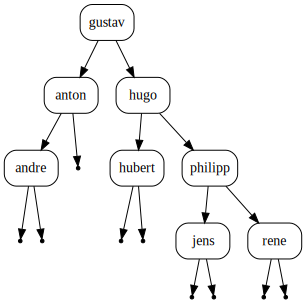

In [18]:
t = demo()
t.toDot()

andre


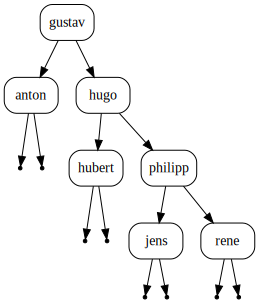

anton


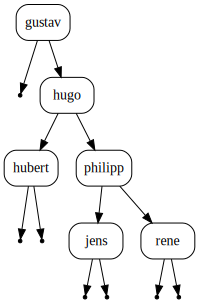

gustav


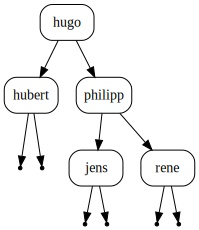

hubert


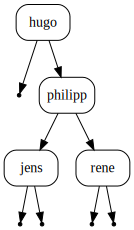

hugo


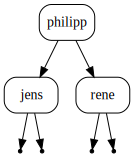

jens


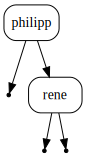

philipp


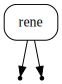

rene


In [19]:
while not t.isEmpty():
    print(t.pop())
    display(t.toDot())

Let's generate an ordered binary tree with random keys.

In [20]:
import random as rnd

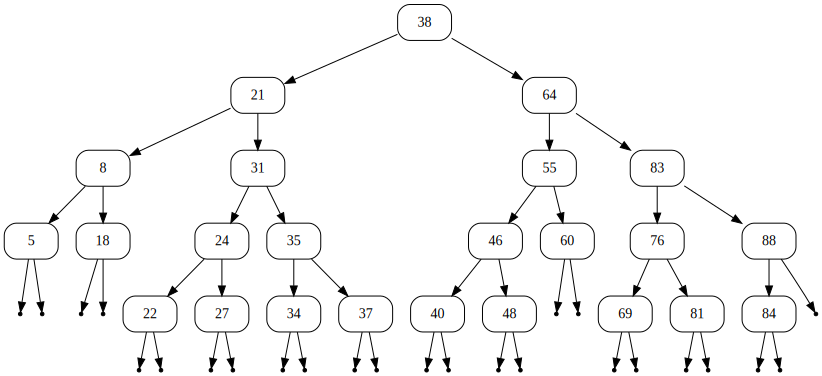

5 8 18 21 22 24 27 31 34 35 37 38 40 46 48 55 60 64 69 76 81 83 84 88 

In [21]:
t = Set()
for k in range(30):
    k = rnd.randrange(100)
    t.insert(k)
display(t.toDot())
while not t.isEmpty():
    print(t.pop(), end=' ')
display(t.toDot())

This tree looks more or less balanced.  Lets us try to create a tree by inserting sorted numbers because that resulted in linear complexity for ordered binary trees.

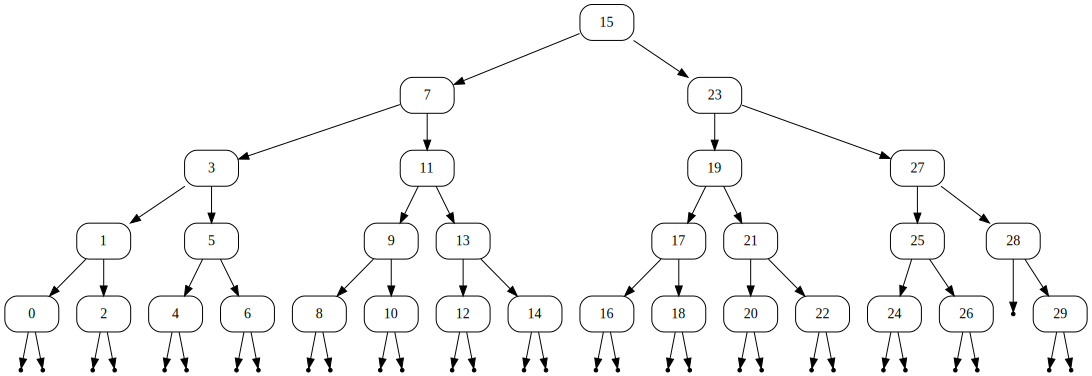

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [22]:
t = Set()
for k in range(30):
    t.insert(k)
display(t.toDot())
while not t.isEmpty():
    print(t.pop(), end=' ')
display(t.toDot())

Next, we compute the set of prime numbers $\leq 100$.  Mathematically, this set is given as follows:
$$ \bigl\{2, \cdots, 100 \bigr\} - \bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$$

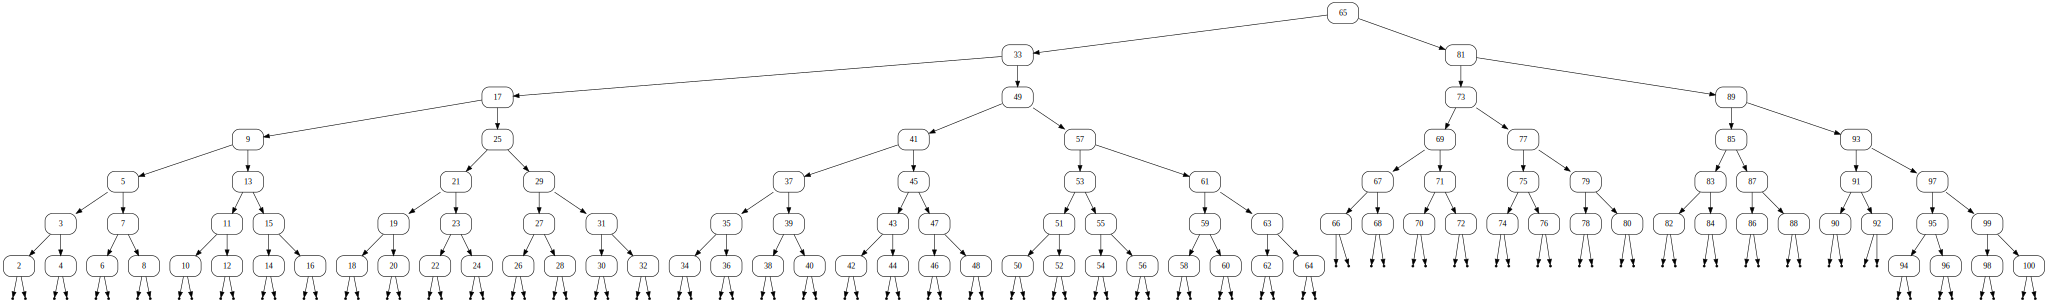

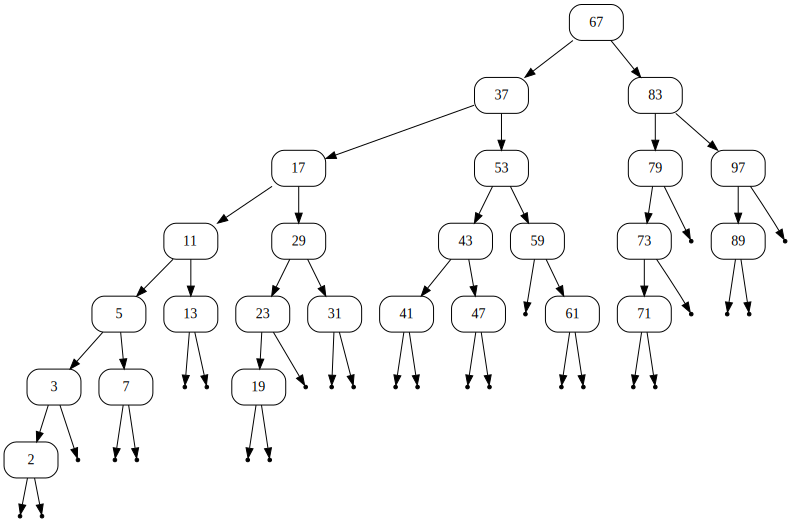

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [23]:
S = Set()
for k in range(2, 101):
    S.insert(k)
display(S.toDot())
for i in range(2, 101):
    for j in range(2, 101):
        S.delete(i * j)
display(S.toDot())
while not S.isEmpty():
    print(S.pop(), end=' ')
display(S.toDot())